In [68]:
# coding: utf-8
import scipy.io as io
import numpy as np
import math
import matplotlib.pyplot as plt
plt.gray();
import matplotlib.patheffects as pe
import seaborn as sb
from sklearn.manifold import TSNE 
from PIL import Image as img
%matplotlib inline
# from IPython.display import display
infinity = float(-2**31)

mat = io.loadmat('./data/train_32x32.mat')
X = mat['X'] # (32, 32, 3, 73257)
Y = mat['y'] # (73257, 1)
n=X.shape[-1]
# 转灰度图
# X_gray = np.zeros((X.shape[-1],X.shape[0]*X.shape[1]))
# for i in range(X.shape[-1]):
#     X_gray[i]=np.array(img.fromarray(X[:,:,:,0],"RGB").convert('L')).reshape(1,-1)
# X=X_gray
X=X.reshape(-1,n).transpose()  # (73257,3072)
# X = np.column_stack((np.full((n,1),1),X)) #  hstack
X = X[5000:6000]
Y = Y[5000:6000]
Y=Y-1
print(X.shape)
# X=X/255
# X=(X/255-0.5)*2

# mat = io.loadmat('./data/test_32x32.mat')
# X_test = mat['X']
# Y_test = mat['y']
# n_test=X_test.shape[-1]
# X_test=X_test.reshape(-1,n_test).transpose()
# X_test = np.column_stack((np.full((n_test,1),1),X_test))
# X_test = X_test[0:100]
# Y_test = Y_test[0:100]
# X_test=(X_test/255-0.5)*2
# X_test=X_test/255

num_label=10
X = np.vstack([X[(Y==i)[:,0]] for i in range(num_label)]) 
Y = np.vstack([Y[(Y==i)[:,0]] for i in range(num_label)])

(1000, 3072)


In [69]:
print(tsne_output.shape)

(1000, 2)


D:\Anaconda3.5.3.1\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


(<Figure size 2304x2304 with 1 Axes>,
 [Text(0.0660884,0.178357,'0'),
  Text(0.149798,0.385137,'1'),
  Text(0.0729089,0.114943,'2'),
  Text(0.263264,0.187876,'3'),
  Text(0.126724,0.127386,'4'),
  Text(0.183948,-0.0907292,'5'),
  Text(0.0459497,0.18938,'6'),
  Text(0.114638,1.11921,'7'),
  Text(0.107215,0.927888,'8'),
  Text(-0.010787,-0.0213846,'9')])

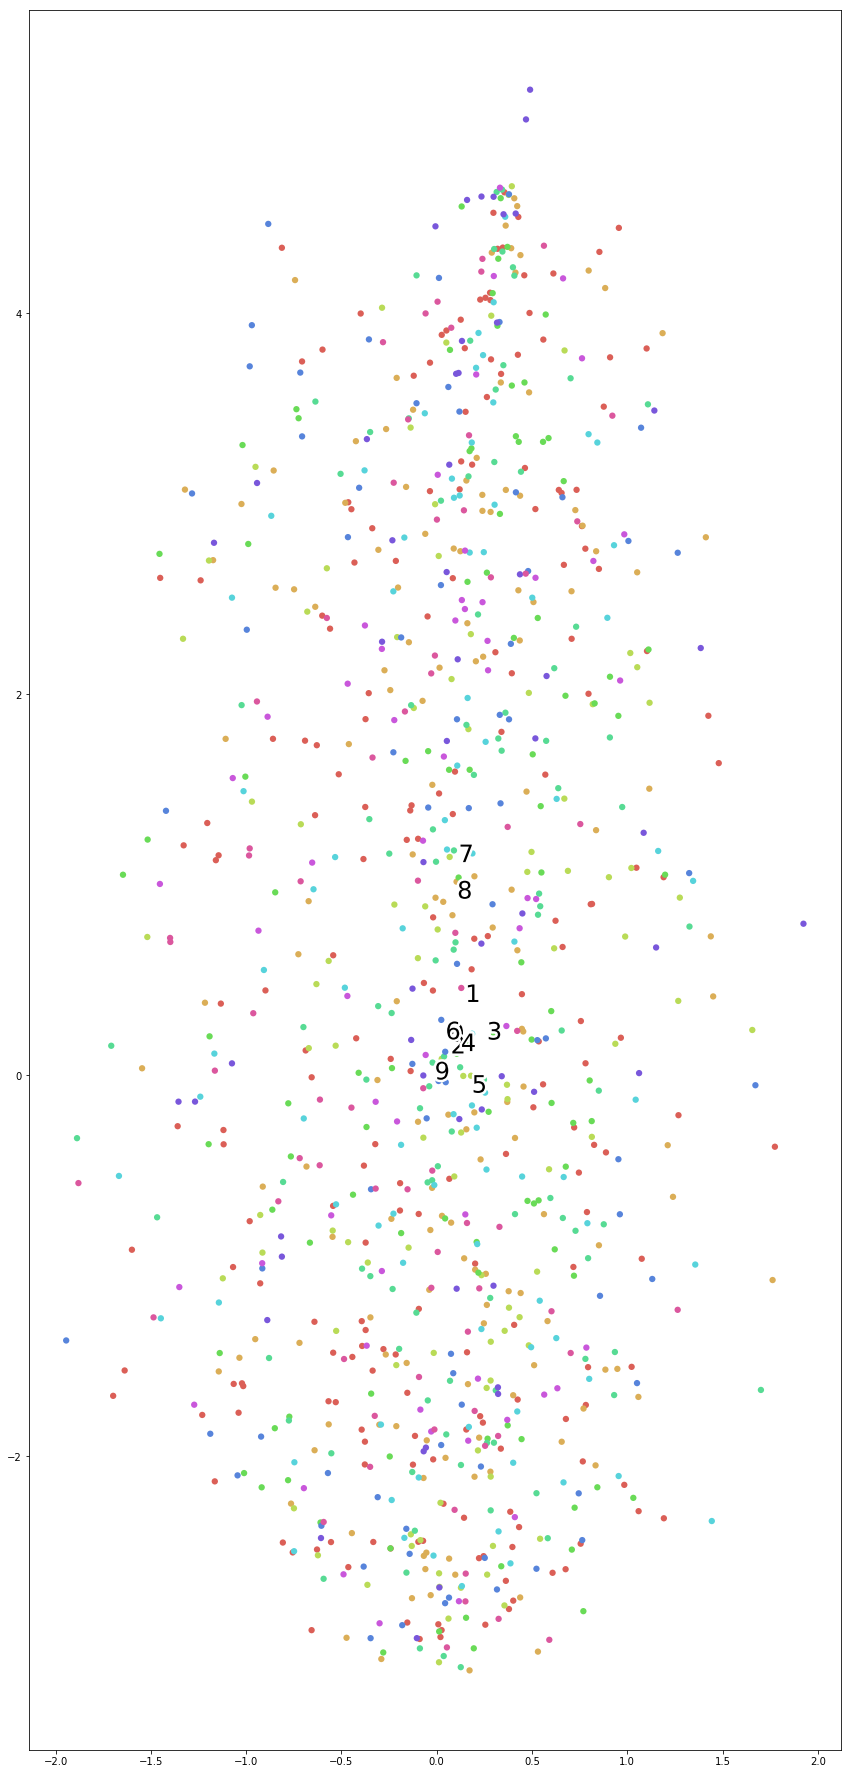

In [71]:
def plot(x, colors):
    # 生成10种颜色出来
    palette = np.array(sb.color_palette("hls", num_label)) 
#     print(palette.shape)
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    # 将第一维和第二维作为xy坐标
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    txts = []
    for i in range(num_label):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts
tsne_output = TSNE(n_components=2,perplexity=50,n_iter=5000).fit_transform(X) 
plot(tsne_output,Y[:,0])

In [ ]:
#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

digits = load_digits()
print(type(digits))
print(type(digits.data))
print(digits.data.shape) # There are 10 classes (0 to 9) with alomst 180 images in each class 
                         # The images are 8x8 and hence 64 pixels(dimensions)
print(type(digits.target))
# digits.target=digits.target.reshape(-1,1)
print(digits.target.shape)
print(type(digits.images))
print(digits.images.shape)

plt.gray();
#Displaying what the standard images look like
# for i in range(0,10):
#     plt.matshow(digits.images[i]) 
#     plt.show()


# digits.target=digits.target.reshape(-1,1)
# X = np.vstack([digits.data[(digits.target==i)[:,0]] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
# Y = np.vstack([digits.target[(digits.target==i)[:,0]] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y
X = np.vstack([digits.data[digits.target==i] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
Y = np.hstack([digits.target[digits.target==i] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y

print(X.shape)
print(Y.shape)
for i in range(1280,1290):
    plt.matshow(X[i].reshape(8,8)) 
    plt.show()
    print(Y[i])

digits_final = TSNE(perplexity=30).fit_transform(X) 
def plot(x, colors):
    palette = np.array(sb.color_palette("hls", 10)) 
    print(palette.shape)
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts
plot(digits_final,Y)
